In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os, fnmatch
def find(pattern, path):
    """Utility to find files wrt a regex search"""
    result = []
    for root, dirs, files in os.walk(path):
        for name in files:
            if fnmatch.fnmatch(name, pattern):
                result.append(os.path.join(root, name))
    return result

In [2]:
FIND_FOLDER="D:\segmented_data\segmented_data"
png_files=find('*.png', FIND_FOLDER)
print(len(png_files),"Files Found.")

7597 Files Found.


In [3]:
import random
num_subset = 3
random.seed(42) # 42 # 2021
subset_png_files =  random.choices(png_files, k=num_subset) # dcm_files[:3]
subset_png_files

['D:\\segmented_data\\segmented_data\\train\\916b23b7b444.png',
 'D:\\segmented_data\\segmented_data\\test\\256f0960de75.png',
 'D:\\segmented_data\\segmented_data\\train\\216f1644fc2e.png']

In [4]:
import matplotlib.pyplot as plt
import cv2

In [5]:
def masking_ratio(img):
    Shape_X,Shape_Y = img.shape
    zeros_img = np.sum(img == 0)
    non_zeros_img = Shape_X * Shape_Y - zeros_img
    return non_zeros_img/(Shape_X * Shape_Y)

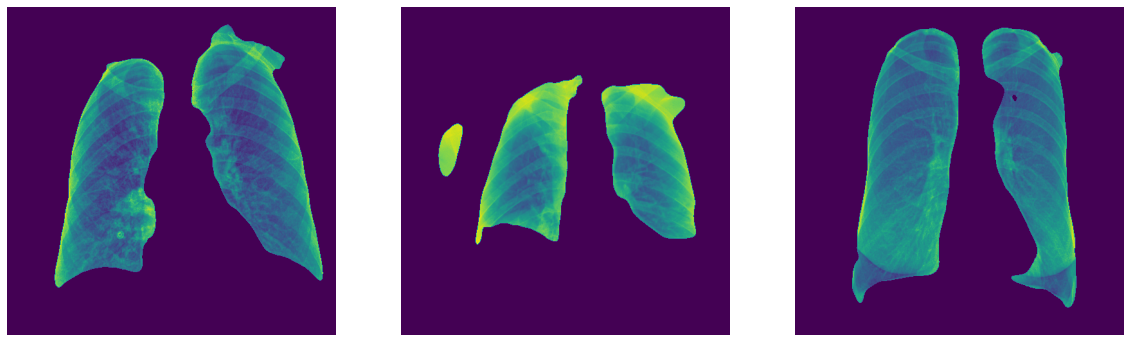

In [6]:
fig, ax = plt.subplots(1, num_subset, figsize=(20, 12))

for i,path in enumerate(subset_png_files):
    ax[i].imshow(cv2.imread(path,0), cmap="viridis")
    ax[i].axis('off')

plt.show()

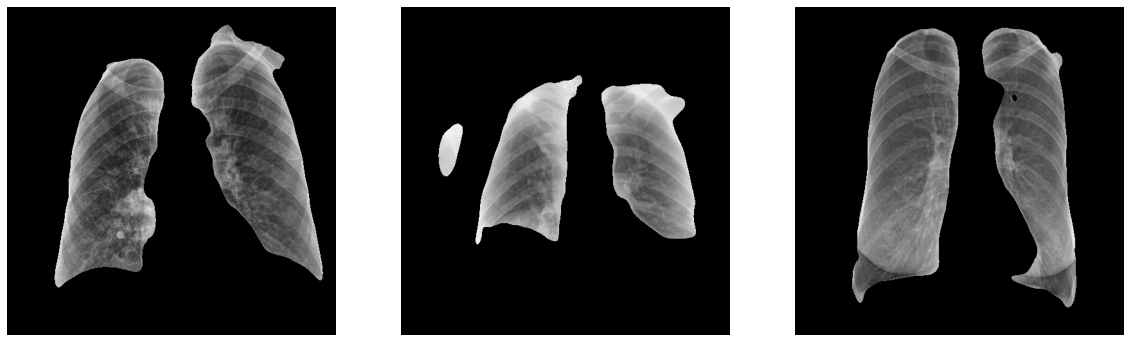

In [7]:
fig, ax = plt.subplots(1, num_subset, figsize=(20, 12))

for i,path in enumerate(subset_png_files):
    ax[i].imshow(cv2.imread(path,0), cmap="gray")
    ax[i].axis('off')

plt.show()

In [8]:
for i,path in enumerate(subset_png_files):
    print(masking_ratio(cv2.imread(path,0)))

0.3198661804199219
0.19914627075195312
0.3330802917480469


In [9]:
import tqdm
masking_ratio_vals = np.zeros((len(png_files)))
for i,path in tqdm.tqdm(enumerate(png_files)):
    masking_ratio_vals[i] = masking_ratio(cv2.imread(path,0))

7597it [00:42, 178.95it/s]


In [10]:
plt.style.use('dark_background')

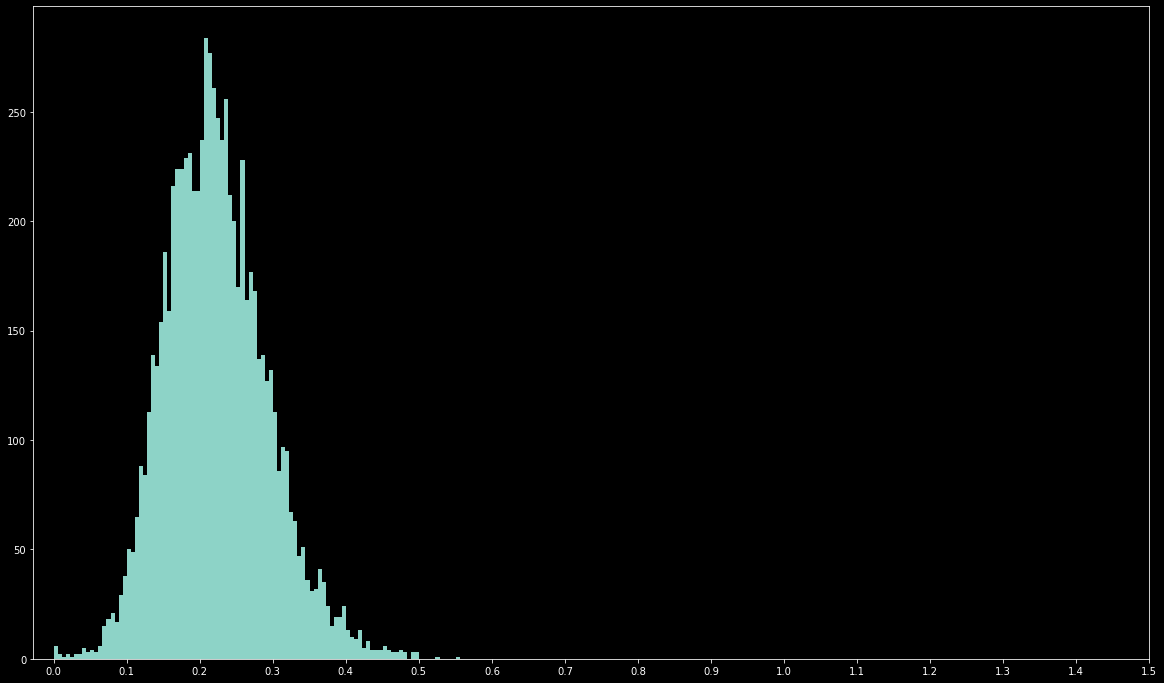

In [11]:
plt.figure(figsize=(20,12))
plt.hist(masking_ratio_vals,bins=100)
plt.xticks(np.arange(min(masking_ratio_vals), max(masking_ratio_vals)+1, 0.1))
plt.show()

In [12]:
THRESH_VALUE = 0.12

In [15]:
num_samples=50
sorted_masks_idx=masking_ratio_vals.argsort()
bad_masks_idx=sorted_masks_idx[10:13]
good_masks_idx=sorted_masks_idx[7000:7003]

Masking Ratio Values : 0.3230476379394531
Masking Ratio Values : 0.3230857849121094
Masking Ratio Values : 0.3231010437011719


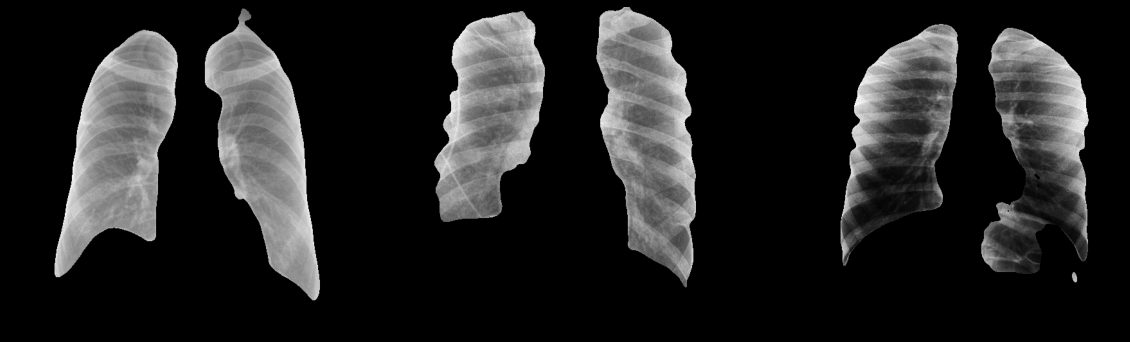

In [16]:
fig, ax = plt.subplots(1, num_subset, figsize=(20, 12))
c=0


for i in good_masks_idx:
    ax[c].imshow(cv2.imread(png_files[i],0), cmap="gray")
    ax[c].axis('off')
    print("Masking Ratio Values :",masking_ratio_vals[i])
    c+=1

plt.show()

Masking Ratio Values : 0.02057647705078125
Masking Ratio Values : 0.026153564453125
Masking Ratio Values : 0.02986907958984375


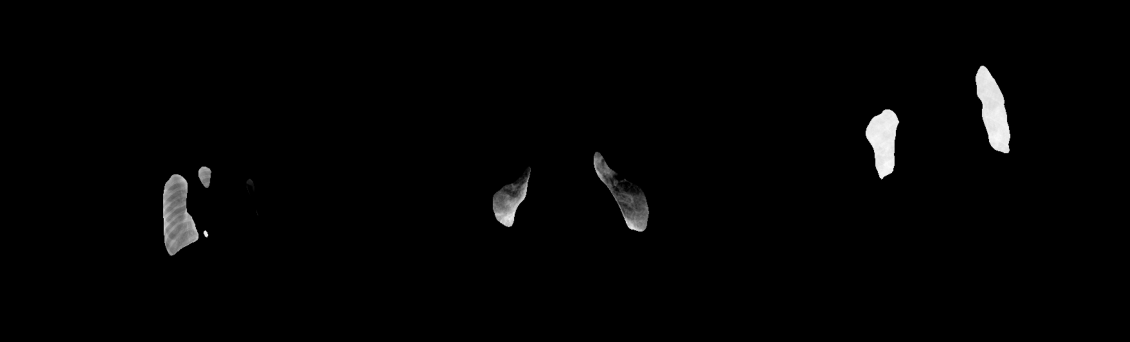

In [17]:
fig, ax = plt.subplots(1, num_subset, figsize=(20, 12))
c=0


for i in bad_masks_idx:
    ax[c].imshow(cv2.imread(png_files[i],0), cmap="gray")
    ax[c].axis('off')
    print("Masking Ratio Values :",masking_ratio_vals[i])
    c+=1

plt.show()

In [18]:
df = pd.DataFrame.from_dict({'image_id': list(map(lambda x: os.path.basename(x), png_files)), 
                             'image_path': png_files, 
                             'masking_ratio': masking_ratio_vals, 
                             'is_well_segmented': masking_ratio_vals>THRESH_VALUE})
df.to_csv('segmented_metadata.csv', index=False)

In [19]:
df

,image_id,image_path,masking_ratio,is_well_segmented
0,0026720152f5.png,D:\segmented_data\segmented_data\test\00267201...,0.211082,True
1,00fc8fc35dc1.png,D:\segmented_data\segmented_data\test\00fc8fc3...,0.122826,True
2,01c3512eebc3.png,D:\segmented_data\segmented_data\test\01c3512e...,0.235641,True
3,01f948f8e544.png,D:\segmented_data\segmented_data\test\01f948f8...,0.215496,True
4,022146012034.png,D:\segmented_data\segmented_data\test\02214601...,0.300064,True
...,...,...,...,...
7592,ffcc6edd9445.png,D:\segmented_data\segmented_data\train\ffcc6ed...,0.119846,False
7593,ffd91a2c4ca0.png,D:\segmented_data\segmented_data\train\ffd91a2...,0.400944,True
7594,ffd9b6cf2961.png,D:\segmented_data\segmented_data\train\ffd9b6c...,0.244133,True
7595,ffdc682f7680.png,D:\segmented_data\segmented_data\train\ffdc682...,0.199451,True


In [20]:
df.tail(100)

,image_id,image_path,masking_ratio,is_well_segmented
7497,fc2ad19c24fd.png,D:\segmented_data\segmented_data\train\fc2ad19...,0.171814,True
7498,fc2ca834e6c6.png,D:\segmented_data\segmented_data\train\fc2ca83...,0.191551,True
7499,fc2e09c26167.png,D:\segmented_data\segmented_data\train\fc2e09c...,0.153290,True
7500,fc3389119c38.png,D:\segmented_data\segmented_data\train\fc33891...,0.268681,True
7501,fc3cecdf50b2.png,D:\segmented_data\segmented_data\train\fc3cecd...,0.134846,True
...,...,...,...,...
7592,ffcc6edd9445.png,D:\segmented_data\segmented_data\train\ffcc6ed...,0.119846,False
7593,ffd91a2c4ca0.png,D:\segmented_data\segmented_data\train\ffd91a2...,0.400944,True
7594,ffd9b6cf2961.png,D:\segmented_data\segmented_data\train\ffd9b6c...,0.244133,True
7595,ffdc682f7680.png,D:\segmented_data\segmented_data\train\ffdc682...,0.199451,True
